In [4]:
import sys
sys.path.append('C:/_TME/Projet-ML')


In [5]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

from Lineaire.Linear import Linear
from Activation.Tanh import Tanh
from Loss.CELogSoftMax import CELogSoftMax
from Loss.CELoss import CELoss
from Activation.SoftMax import SoftMax
from Encapsulation.Sequentiel import Sequentiel
from Encapsulation.Optim import SGD

from icecream import ic


digits.data.shape=(1797, 64)


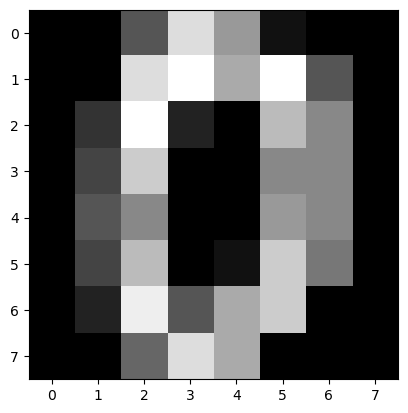

In [6]:
digits = load_digits()
print(f'{digits.data.shape=}')

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

plt.imshow(digits.images[0], cmap='grey')
plt.show()


def transform_one_hot(classe):
    a =  np.zeros(10)
    a[classe] = 1
    return a

y_train_one_hot=[]
for y in y_train:
    y_train_one_hot.append(transform_one_hot(y))
    
y_train_one_hot = np.array(y_train_one_hot)


In [57]:
y_test_one_hot=[]
for y in y_test:
    y_test_one_hot.append(transform_one_hot(y))
    
y_test_one_hot = np.array(y_test_one_hot)

In [10]:
ic.disable()

In [8]:
def pred_classes(y_hat):
    classes_predites = np.argmax(y_hat, axis=1)
    predictions = []
    for y in classes_predites:
        predictions.append(transform_one_hot(y))
    
    predictions= np.array(predictions)
    return predictions

def score(y, yhat):
    predictions = pred_classes(yhat)
    ic(predictions)
    ic(y)
    comparaison = ic((predictions == 1) * (y == 1))
    s = np.sum(comparaison)
    return s, s/len(yhat)


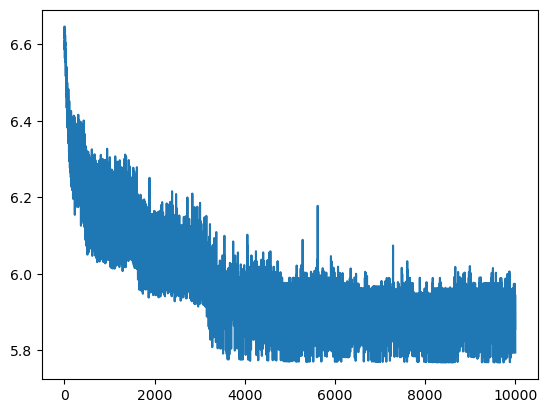

accuracy :  (1206, 0.8392484342379958)


In [9]:
lineaire1 = Linear(64, 8, name='lin1')
tanh = Tanh()
lineaire2 = Linear(8, 10, name='lin2')
loss_celogsoftmax = CELogSoftMax()
softmax = SoftMax()

net = Sequentiel(lineaire1, tanh, lineaire2, softmax)

net, couts, opt = SGD(net, X_train, y_train_one_hot, nb_batch=20, loss=loss_celogsoftmax, nb_epochs=500, eps=1e-2, shuffle=False)

plt.plot(np.arange(len(couts)), couts)
plt.show()

raw_scores = net.forward(X_train)


print("accuracy : ", score(y_train_one_hot, raw_scores))


# Autres tests

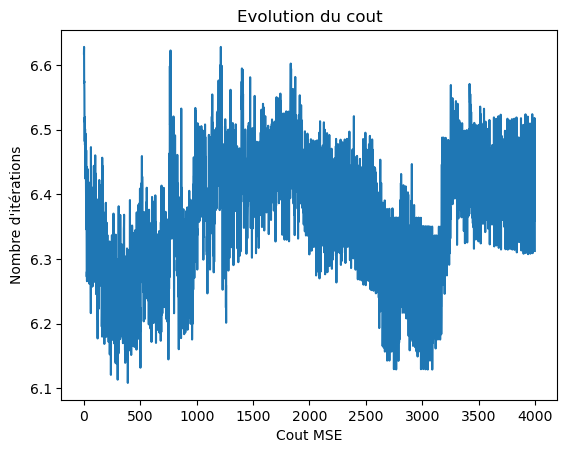

In [48]:
lineaire1 = Linear(64, 32, name='lin1')
tanh = Tanh()
lineaire2 = Linear(32, 10, name='lin2')
loss_celogsoftmax = CELogSoftMax()
softmax = SoftMax()

net = Sequentiel(lineaire1, tanh, lineaire2, softmax)

net, couts, opt = SGD(net, X_train, y_train_one_hot, nb_batch=20, loss=loss_celogsoftmax, nb_epochs=200, eps=1e-1, shuffle=False)

plt.plot(np.arange(len(couts)), couts)
plt.title("Evolution du cout")
plt.xlabel("Cout CELogSoftMax")
plt.ylabel("Nombre d'itérations")
plt.show()

raw_scores = net.forward(X_train)




## Resultats faibles

In [46]:
print("accuracy : ", score(y_train_one_hot, raw_scores)) #64 32 10 nbbatch = 20, epoch = 150, eps=1e-1

accuracy :  (457, 0.3180236604036186)


In [43]:
print("accuracy : ", score(y_train_one_hot, raw_scores)) #64 32 10 nbbatch = 20, epoch = 150, eps=1e-3

accuracy :  (705, 0.4906054279749478)


In [41]:
print("accuracy : ", score(y_train_one_hot, raw_scores)) #64 32 10 nbbatch = 20, epoch = 150, eps=1e-3

accuracy :  (586, 0.4077940153096729)


In [ ]:
print("accuracy : ", score(y_train_one_hot, raw_scores)) #64 32 10 nbbatch = 5

accuracy :  (1020, 0.7098121085594989)


In [ ]:
print("accuracy : ", score(y_train_one_hot, raw_scores)) #64 10 10 nbbatch = 10

accuracy :  (657, 0.4572025052192067)


In [ ]:
print("accuracy : ", score(y_train_one_hot, raw_scores)) #64, 10, 10

accuracy :  (145, 0.10090466249130133)


In [ ]:
print("accuracy : ", score(y_train_one_hot, raw_scores)) #64, 32, 10

accuracy :  (145, 0.10090466249130133)


In [ ]:
print("accuracy : ", score(y_train_one_hot, raw_scores)) #64 8, 10 shuffle False

accuracy :  (1206, 0.8392484342379958)


## Bons resultats

In [ ]:
lineaire1 = Linear(64, 8, name='lin1')
tanh = Tanh()
lineaire2 = Linear(8, 10, name='lin2')
loss_celogsoftmax = CELogSoftMax()
softmax = SoftMax()

net = Sequentiel(lineaire1, tanh, lineaire2, softmax)

net, couts, opt = SGD(net, X_train, y_train_one_hot, nb_batch=20, loss=loss_celogsoftmax, nb_epochs=200, eps=1e-2, shuffle=True)

plt.plot(np.arange(len(couts)), couts)
plt.title("Evolution du cout")
plt.xlabel("Cout CELogSoftMax")
plt.ylabel("Nombre d'itérations")
plt.show()

raw_scores_train = net.forward(X_train)
raw_scores_test = net.forward(X_test)

In [104]:
print("accuracy : ", score(y_train_one_hot, raw_scores_train)) #64 8 10 nbbatch = 20, epoch = 150, Shuffle False
print("accuracy test: ", score(y_test_one_hot, raw_scores_test))

accuracy :  (1191, 0.8288100208768268)
accuracy test:  (283, 0.7861111111111111)


In [106]:
print("accuracy : ", score(y_train_one_hot, raw_scores_train)) #64 8 10 nbbatch = 20, epoch = 150, Shuffle False
print("accuracy test: ", score(y_test_one_hot, raw_scores_test))

accuracy :  (1172, 0.8155880306193458)
accuracy test:  (285, 0.7916666666666666)


In [78]:
print("accuracy : ", score(y_train_one_hot, raw_scores_train)) #64 32 10 nbbatch = 20, epoch = 150, Shuffle True
print("accuracy test: ", score(y_test_one_hot, raw_scores_test))

accuracy :  (1345, 0.9359777313848295)
accuracy test:  (317, 0.8805555555555555)


In [76]:
print("accuracy : ", score(y_train_one_hot, raw_scores_train)) #64 32 10 nbbatch = 20, epoch = 150
print("accuracy test: ", score(y_test_one_hot, raw_scores_test)) #Shuffle false

accuracy :  (1321, 0.919276270006959)
accuracy test:  (321, 0.8916666666666667)


In [102]:
print("accuracy : ", score(y_train_one_hot, raw_scores)) #64 32 10 nbbatch = 20, epoch = 200 shuffle = False
print("accuracy test: ", score(y_test_one_hot, raw_scores_test))

accuracy :  (1307, 0.9095337508698678)
accuracy test:  (322, 0.8944444444444445)


In [100]:
print("accuracy : ", score(y_train_one_hot, raw_scores_train)) #64 32 10 nbbatch = 20, epoch = 200 shuffle = True
print("accuracy test: ", score(y_test_one_hot, raw_scores_test))

accuracy :  (1307, 0.9095337508698678)
accuracy test:  (314, 0.8722222222222222)


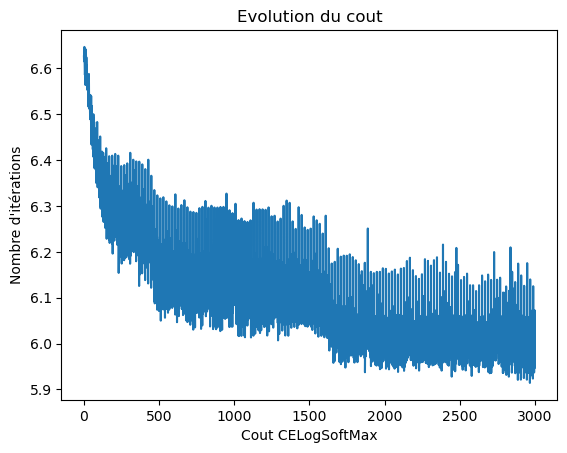

In [108]:
lineaire1 = Linear(64, 8, name='lin1')
tanh = Tanh()
lineaire2 = Linear(8, 10, name='lin2')
loss_celogsoftmax = CELogSoftMax()
softmax = SoftMax()

net = Sequentiel(lineaire1, tanh, lineaire2, softmax)

net, couts, opt = SGD(net, X_train, y_train_one_hot, nb_batch=20, loss=loss_celogsoftmax, nb_epochs=150, eps=1e-2, shuffle=False)

plt.plot(np.arange(len(couts)), couts)
plt.title("Evolution du cout")
plt.xlabel("Cout CELogSoftMax")
plt.ylabel("Nombre d'itérations")
plt.show()

raw_scores_train = net.forward(X_train)
raw_scores_test = net.forward(X_test)

## Modifier nb neurones

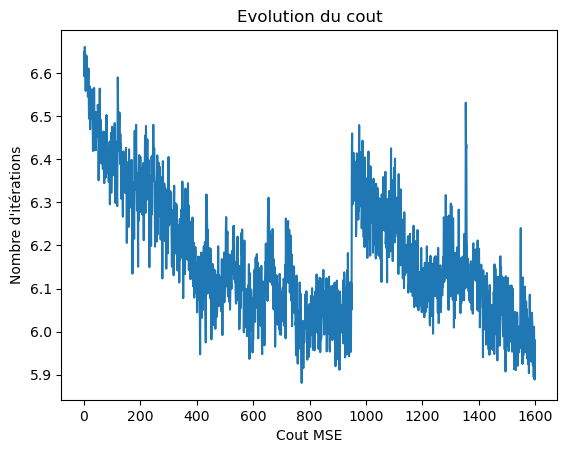

In [93]:
lineaire1 = Linear(64, 32, name='lin1')
tanh = Tanh()
lineaire2 = Linear(32, 8, name='lin1')
tanh2 = Tanh()
lineaire3 = Linear(8, 32, name='lin2')
tanh3 = Tanh()
lineaire4 = Linear(32, 10, name='lin2')
loss_celogsoftmax = CELogSoftMax()
softmax = SoftMax()

net = Sequentiel(lineaire1, tanh, lineaire2, tanh2, lineaire3, tanh3, lineaire4, softmax)

net, couts, opt = SGD(net, X_train, y_train_one_hot, nb_batch=20, loss=loss_celogsoftmax, nb_epochs=80, eps=1e-2, shuffle=True)

plt.plot(np.arange(len(couts)), couts)
plt.title("Evolution du cout")
plt.xlabel("Cout MSE")
plt.ylabel("Nombre d'itérations")
plt.show()

raw_scores_train = net.forward(X_train)
raw_scores_test = net.forward(X_test)

In [94]:
print("accuracy train: ", score(y_train_one_hot, raw_scores))  # 800 epochs
print("accuracy test: ", score(y_test_one_hot, raw_scores_test))

accuracy train:  (1307, 0.9095337508698678)
accuracy test:  (269, 0.7472222222222222)


In [95]:
print("accuracy train: ", score(y_train_one_hot, raw_scores)) #2000 epochs
print("accuracy test: ", score(y_test_one_hot, raw_scores_test))

accuracy train:  (1307, 0.9095337508698678)
accuracy test:  (269, 0.7472222222222222)
